In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
data = pd.read_csv('amazon_tshirts_new.csv')

In [30]:
data.rename(columns={'Tshirt_no_of_ratings':'Number_of_ratings','Tshirt_cstmr_rating_name':'Customer_rating','Tshirt_cstmr_rating_cstmr_review':'Customer_Review','Tshirt_cstmr_rating_date':'Review_date'},inplace=True)
data.head()

,Tshirt_name,Tshirt_image,Tshirt_rating,Number_of_ratings,Customer_rating,Customer_Review,Review_date
0,Chromozome Men's Plain Regular Fit T-Shirt (Pa...,https://images-eu.ssl-images-amazon.com/images...,3.9 out of 5 stars,"3,660",4.0 out of 5 stars,Value for money.,Reviewed in India on 5 January 2019
1,Chromozome Men's Plain Regular Fit T-Shirt (Pa...,https://images-eu.ssl-images-amazon.com/images...,3.9 out of 5 stars,"3,660",5.0 out of 5 stars,Nice if re-purposed as vests,Reviewed in India on 2 September 2018
2,Chromozome Men's Plain Regular Fit T-Shirt (Pa...,https://images-eu.ssl-images-amazon.com/images...,3.9 out of 5 stars,"3,660",5.0 out of 5 stars,Justify the price,Reviewed in India on 15 November 2018
3,Chromozome Men's Plain Regular Fit T-Shirt (Pa...,https://images-eu.ssl-images-amazon.com/images...,3.9 out of 5 stars,"3,660",5.0 out of 5 stars,Rs530 for 3 t-shirts good deal,Reviewed in India on 22 January 2019
4,Chromozome Men's Plain Regular Fit T-Shirt (Pa...,https://images-eu.ssl-images-amazon.com/images...,3.9 out of 5 stars,"3,660",5.0 out of 5 stars,Very Qualitative,Reviewed in India on 1 December 2018


In [31]:
#data['Tshirt_name'].value_counts()
#data['clean_date'] = data.Review_date.apply(
 #   lambda x: pd.to_datetime(x).strftime('%m/%d/%Y')[0])
data['Review_date'] = data['Review_date'].str[21:]
data['Review_date'] = pd.to_datetime(data['Review_date'])
data['Review_date'] = data['Review_date'].dt.strftime('%Y%m%d')
#data['Review_date'] = data['Review_date'].astype(int)
data.head()

,Tshirt_name,Tshirt_image,Tshirt_rating,Number_of_ratings,Customer_rating,Customer_Review,Review_date
0,Chromozome Men's Plain Regular Fit T-Shirt (Pa...,https://images-eu.ssl-images-amazon.com/images...,3.9 out of 5 stars,"3,660",4.0 out of 5 stars,Value for money.,20190105
1,Chromozome Men's Plain Regular Fit T-Shirt (Pa...,https://images-eu.ssl-images-amazon.com/images...,3.9 out of 5 stars,"3,660",5.0 out of 5 stars,Nice if re-purposed as vests,20180902
2,Chromozome Men's Plain Regular Fit T-Shirt (Pa...,https://images-eu.ssl-images-amazon.com/images...,3.9 out of 5 stars,"3,660",5.0 out of 5 stars,Justify the price,20181115
3,Chromozome Men's Plain Regular Fit T-Shirt (Pa...,https://images-eu.ssl-images-amazon.com/images...,3.9 out of 5 stars,"3,660",5.0 out of 5 stars,Rs530 for 3 t-shirts good deal,20190122
4,Chromozome Men's Plain Regular Fit T-Shirt (Pa...,https://images-eu.ssl-images-amazon.com/images...,3.9 out of 5 stars,"3,660",5.0 out of 5 stars,Very Qualitative,20181201


In [32]:
data['Tshirt_name'] = data.Tshirt_name.astype(str) 
data['Review_date'] = data.Review_date.astype(str) 
data['Customer_rating'] = data.Customer_rating.astype(str)

# Taking rating and converting it to numeric
## Review date is in format YYYY_MM_DD as first year should be compared then month and then date

In [33]:
data['Customer_rating'] = data['Customer_rating'].str[:3]
data['Customer_rating'] = pd.to_numeric(data['Customer_rating'])
#data['Customer_rating'] = data['Customer_rating'].astype(int)
data.Review_date = pd.to_numeric(data.Review_date,errors='coerce')

data.dtypes

Tshirt_name           object
Tshirt_image          object
Tshirt_rating         object
Number_of_ratings     object
Customer_rating      float64
Customer_Review       object
Review_date          float64
dtype: object

In [83]:
data['Number_of_ratings'] = data['Number_of_ratings'].str.replace(',','').astype(int)
data = data.dropna()

AttributeError: Can only use .str accessor with string values!

In [84]:
data

,Tshirt_name,Tshirt_image,Tshirt_rating,Number_of_ratings,Customer_rating,Customer_Review,Review_date
0,Chromozome Men's Plain Regular Fit T-Shirt (Pa...,https://images-eu.ssl-images-amazon.com/images...,3.9 out of 5 stars,3660,4.0,Value for money.,20190105.0
1,Chromozome Men's Plain Regular Fit T-Shirt (Pa...,https://images-eu.ssl-images-amazon.com/images...,3.9 out of 5 stars,3660,5.0,Nice if re-purposed as vests,20180902.0
2,Chromozome Men's Plain Regular Fit T-Shirt (Pa...,https://images-eu.ssl-images-amazon.com/images...,3.9 out of 5 stars,3660,5.0,Justify the price,20181115.0
3,Chromozome Men's Plain Regular Fit T-Shirt (Pa...,https://images-eu.ssl-images-amazon.com/images...,3.9 out of 5 stars,3660,5.0,Rs530 for 3 t-shirts good deal,20190122.0
4,Chromozome Men's Plain Regular Fit T-Shirt (Pa...,https://images-eu.ssl-images-amazon.com/images...,3.9 out of 5 stars,3660,5.0,Very Qualitative,20181201.0
...,...,...,...,...,...,...,...
373,Van Heusen Athleisure Men's Solid Regular Fit ...,https://images-eu.ssl-images-amazon.com/images...,4.2 out of 5 stars,512,5.0,Worth for money,20200218.0
374,Van Heusen Athleisure Men's Solid Regular Fit ...,https://images-eu.ssl-images-amazon.com/images...,4.2 out of 5 stars,512,4.0,One u can go for!,20190424.0
375,Van Heusen Athleisure Men's Solid Regular Fit ...,https://images-eu.ssl-images-amazon.com/images...,4.2 out of 5 stars,512,5.0,Amazing Cloudtail!,20190720.0
376,Van Heusen Athleisure Men's Solid Regular Fit ...,https://images-eu.ssl-images-amazon.com/images...,4.2 out of 5 stars,512,5.0,Perfect product to buy,20200625.0


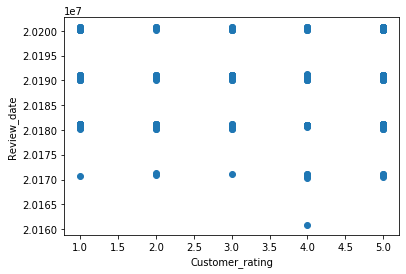

In [62]:
plt.scatter(data['Customer_rating'],data['Review_date'])
plt.xlabel('Customer_rating')
plt.ylabel('Review_date')
plt.show()

# Performing K-means clustering

In [93]:
X = pd.DataFrame()
X['rating']= data['Customer_rating']
X['date'] = data['Review_date']
#X = X[X['date'].notna()]
X1 = X.to_numpy()
X1

array([[4.0000000e+00, 2.0190105e+07],
       [5.0000000e+00, 2.0180902e+07],
       [5.0000000e+00, 2.0181115e+07],
       [5.0000000e+00, 2.0190122e+07],
       [5.0000000e+00, 2.0181201e+07],
       [4.0000000e+00, 2.0190709e+07],
       [1.0000000e+00, 2.0190603e+07],
       [3.0000000e+00, 2.0190125e+07],
       [1.0000000e+00, 2.0200305e+07],
       [3.0000000e+00, 2.0200224e+07],
       [3.0000000e+00, 2.0200229e+07],
       [5.0000000e+00, 2.0200308e+07],
       [3.0000000e+00, 2.0200523e+07],
       [1.0000000e+00, 2.0200525e+07],
       [3.0000000e+00, 2.0200622e+07],
       [5.0000000e+00, 2.0200303e+07],
       [4.0000000e+00, 2.0200611e+07],
       [5.0000000e+00, 2.0200705e+07],
       [5.0000000e+00, 2.0200704e+07],
       [3.0000000e+00, 2.0200620e+07],
       [1.0000000e+00, 2.0200704e+07],
       [4.0000000e+00, 2.0200622e+07],
       [4.0000000e+00, 2.0200704e+07],
       [5.0000000e+00, 2.0200701e+07],
       [5.0000000e+00, 2.0171009e+07],
       [4.0000000e+00, 2.

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
scaler = MinMaxScaler()
scaler.fit(X)
Y = scaler.transform(X)

In [44]:
from sklearn.cluster import KMeans

In [94]:
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=0).fit(X1)
centers = kmeans.cluster_centers_
labels = kmeans.predict(X1)
#y_pred = kmeans.fit_predict(X['Customer_rating','Review_date'])

In [95]:
from sklearn.metrics import silhouette_score

In [96]:
silhouette_score(X,labels)

0.7122437009158081

In [97]:
labels

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

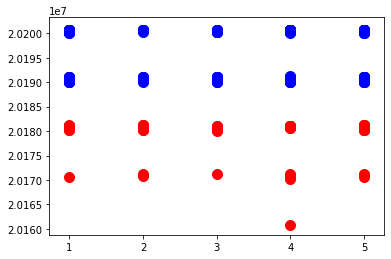

In [99]:
plt.scatter(X1[labels==0,0],X1[labels==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X1[labels==1,0],X1[labels==1,1],s=100,c='blue',label='Cluster2')

# Plot of clusters: Blue=trending, Red=lagging

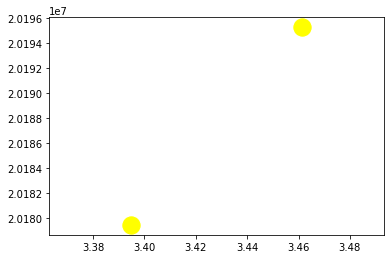

In [91]:
plt.scatter(centers[:,0],centers[:,1],s=300,c='yellow',label='Centroids')

In [179]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = X.index.values
cluster_map['cluster'] = kmeans.labels_

AttributeError: 'numpy.ndarray' object has no attribute 'index'